## Ejercicios con Python Tarea Clase 11
### Pablo Ángel Mendoza Aguirre

Generar valores aleatorios para la siguiente distribución de probabilidad
    $$f(x)=\begin{cases}\frac{2}{(c-a)(b-a)}(x-a), & a\leq x \leq b\\ \frac{-2}{(c-a)(c-b)}(x-c),& b\leq x \leq c \end{cases}$$ con a=1; b=2; c=5; entonces
    

$$f(x) = \begin{cases}\frac{2}{(4)(1)}(x-1), &1\leq x \leq 2\\ \frac{-2}{(4)(3)}(x-5),& 2\leq x \leq 5 \end{cases} = \begin{cases}\frac{1}{2}(x-1), &1\leq x \leq 2\\ \frac{-1}{6}(x-5),& 2\leq x \leq 5 \end{cases}$$

In [1]:
import math as mt
import numpy as np
import pandas as pd
import scipy.stats as st 
from scipy import optimize
from scipy.stats import beta
from itertools import cycle
import matplotlib.pyplot as plt
from math import factorial as fac 
%matplotlib inline

Usando el método de la transformada inversa:
$$x = \begin{cases}(2 y) + 1, & 0 \leq y \leq \frac{1}{2}\\ (-6 y ) + 5,& 0 \leq y \leq \frac{1}{2} \end{cases}$$

1. Usando el método de la transformada inversa.

In [2]:
def dist_triang(x:'valores de la variable independiente',a:'Parámetro a',b:'Parámetro b',c:'Parámetro c'):
    '''Esta función dibuja la distribucón triangular'''
    if x >= a and x<=b:
        fx =  (x-a)*(2/((c-a)*(b-a)))
    elif x> b and x<=c:
        fx = (x-c)*(-2/((c-a)*(c-b)))
    else:
        fx = 0
    return fx
def dist_triang_inv(a:'Parámetro a',b:'Parámetro b',c:'Parámetro c',N:'cantidad de números a generar'):
    '''Esta función genera números aleatorios triangulares'''
    N2 = np.random.uniform(a,c,N)
    N3 = np.random.uniform(0,.5,N)
    tg = []
    for i in range(N):
        if N2[i] >= a and N2[i]<=b:
            fx =  ((N3[i]*((c-a)*(b-a)))/2) + a
        elif N2[i]> b and N2[i]<=c:
            fx =  ((N3[i]*((c-a)*(c-b)))/-2) + c
        tg.append(fx)
        i += 1
    return tg,N3,N2

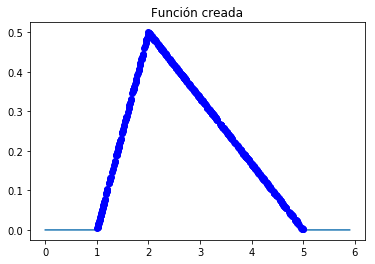

In [3]:
N = 500
a,b,c=1,2,5
x = np.arange(0,6,0.1)
f = list(map(lambda x: dist_triang(x,a,b,c) , x ))
f2,g2,j2 = dist_triang_inv(a,b,c,N)
plt.title("Función creada")
plt.plot(x,f)
plt.plot(f2,g2,'bo')
plt.show()

2. Usando el método de aceptación y rechazo.

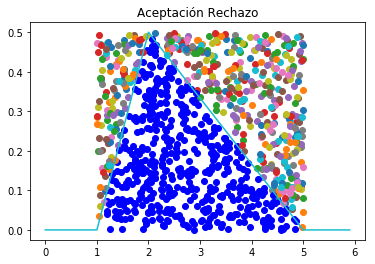

In [4]:
x = np.arange(0,6,0.1)
a,b,c=1,2,5
f = list(map(lambda x: dist_triang(x,a,b,c) , x ))
N = 1000
for i in range(0,N):
    u1 = np.random.uniform(0,.5,1)
    u2 = np.random.uniform(1,5,1)
    if u1 <= dist_triang(u2,a=1,b=2,c=5):
        plt.plot(u2,u1,'ob')
        i+= 1
    else:
        plt.plot(u2,u1,'o')
plt.title("Aceptación Rechazo")
plt.plot(x,f)
plt.show()

3. En la librería `import scipy.stats as st` hay una función que genera variables aleatorias triangulares `st.triang.pdf(x, c, loc, scale)` donde "c,loc,scale" son los parámetros de esta distribución (similares a los que  nuestra función se llaman a,b,c, PERO NO IGUALES). Explorar el help de python para encontrar la equivalencia entre los parámetros "c,loc,scale" y los parámetros de nuestra función con parámetros "a,b,c".

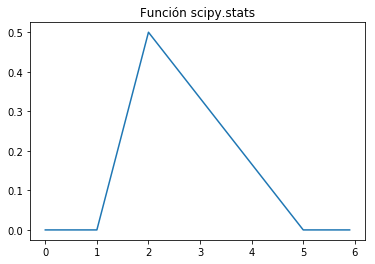

In [5]:
x = np.arange(0,6,0.1)
x2 = np.random.uniform(0,6,100)
a,b,c=1,2,5
h=plt.plot(x,st.triang.pdf(x,((b-a)/(c-a)),a,c-a))
plt.title("Función scipy.stats")
plt.show()

4. Generar 1000 variables aleatorias usando la función creada en el punto 2 y usando la función `st.triang.rvs` y graficar el histograma en dos gráficas diferentes de cada uno de los conjuntos de variables aleatorios creado. Se espera algo como esto:

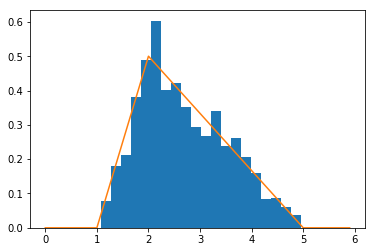

In [6]:
plt.hist(st.triang.rvs(((b-a)/(c-a)),a,c-a, 1000),density=True,bins=20)
plt.plot(x,st.triang.pdf(x,((b-a)/(c-a)),a,c-a))
plt.show()